# Tata Coffee Stock Analysis Project

This notebook performs:
- Stock data download
- Descriptive statistics
- Percentile calculation
- Probability density analysis
- Frequency tables
- Visualization
- Correlation heatmap


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
# Download stock data
start = dt.datetime(2021,6,1)
end = dt.datetime(2022,1,5)

dataset = yf.download("TATACOFFEE13_21.NS", start=start, end=end)

dataset.head()

HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: TATACOFFEE13_21.NS"}}}
$TATACOFFEE13_21.NS: possibly delisted; no timezone found
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TATACOFFEE13_21.NS']: possibly delisted; no timezone found


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATACOFFEE13_21.NS,TATACOFFEE13_21.NS,TATACOFFEE13_21.NS,TATACOFFEE13_21.NS,TATACOFFEE13_21.NS,TATACOFFEE13_21.NS
Date,,,,,,


In [3]:
# Separate quantitative and qualitative columns
def segreQuanQual(dataset):
    quan=[]
    qual=[]
    for column in dataset.columns:
        if dataset[column].dtype=="object":
            qual.append(column)
        else:
            quan.append(column)
    return quan,qual

quan,qual = segreQuanQual(dataset)
quan, qual

([('Adj Close', 'TATACOFFEE13_21.NS'),
  ('Close', 'TATACOFFEE13_21.NS'),
  ('High', 'TATACOFFEE13_21.NS'),
  ('Low', 'TATACOFFEE13_21.NS'),
  ('Open', 'TATACOFFEE13_21.NS'),
  ('Volume', 'TATACOFFEE13_21.NS')],
 [])

In [4]:
# Descriptive analysis
class AnalysisClass:
    def descriptive_Analysis(self, dataset, quan):
        return dataset[quan].describe()

analysis_obj = AnalysisClass()
des_data = analysis_obj.descriptive_Analysis(dataset, quan)

des_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATACOFFEE13_21.NS,TATACOFFEE13_21.NS,TATACOFFEE13_21.NS,TATACOFFEE13_21.NS,TATACOFFEE13_21.NS,TATACOFFEE13_21.NS
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(dataset.columns)

MultiIndex([('Adj Close', 'TATACOFFEE13_21.NS'),
            (    'Close', 'TATACOFFEE13_21.NS'),
            (     'High', 'TATACOFFEE13_21.NS'),
            (      'Low', 'TATACOFFEE13_21.NS'),
            (     'Open', 'TATACOFFEE13_21.NS'),
            (   'Volume', 'TATACOFFEE13_21.NS')],
           names=['Price', 'Ticker'])


In [6]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("Tatacoffee13_21.csv")

# Remove spaces in column names
dataset.columns = dataset.columns.str.strip()

# Convert to numeric
dataset["Low"] = pd.to_numeric(dataset["Low"], errors='coerce')
dataset["High"] = pd.to_numeric(dataset["High"], errors='coerce')

# Remove missing values
dataset = dataset.dropna(subset=["Low", "High"])

# Calculate percentiles
p_low = np.percentile(dataset["Low"], 99)
p_high = np.percentile(dataset["High"], 80)

print(p_low, p_high)


1565.1399999999996 932.0


Probability: 0.009989849997591478


np.float64(0.009989849997591478)

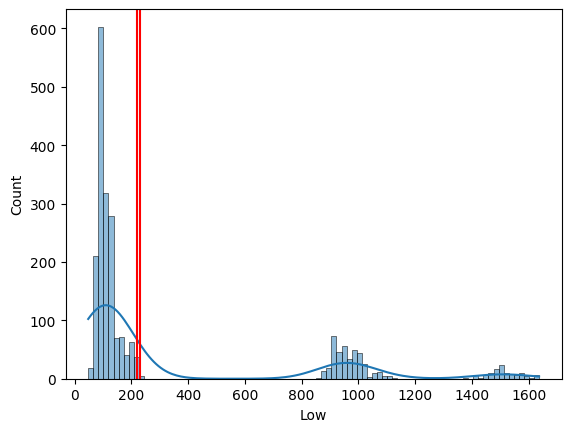

In [7]:
# PDF Probability function
def get_pdf_probability(column, startrange, endrange):
    sns.histplot(column, kde=True)
    plt.axvline(startrange, color='red')
    plt.axvline(endrange, color='red')
    mean = column.mean()
    std = column.std()
    dist = norm(mean, std)
    values = np.arange(startrange, endrange)
    probabilities = dist.pdf(values)
    prob = sum(probabilities)
    print("Probability:", prob)
    return prob

get_pdf_probability(dataset["Low"],219,230)

In [8]:
# Frequency table
def freqTable(columnName, dataset):
    frq = pd.DataFrame()
    frq["Unique Values"] = dataset[columnName].value_counts().index
    frq["Frequency"] = dataset[columnName].value_counts().values
    frq["Relative Frequency %"] = (frq["Frequency"]/len(dataset))*100
    frq["Cumulative %"] = frq["Relative Frequency %"].cumsum()
    return frq

freqTable("High", dataset).head()

,Unique Values,Frequency,Relative Frequency %,Cumulative %
0,93.00,11,0.494382,0.494382
1,95.40,9,0.404494,0.898876
2,91.80,9,0.404494,1.303371
3,113.40,9,0.404494,1.707865
4,93.25,7,0.314607,2.022472


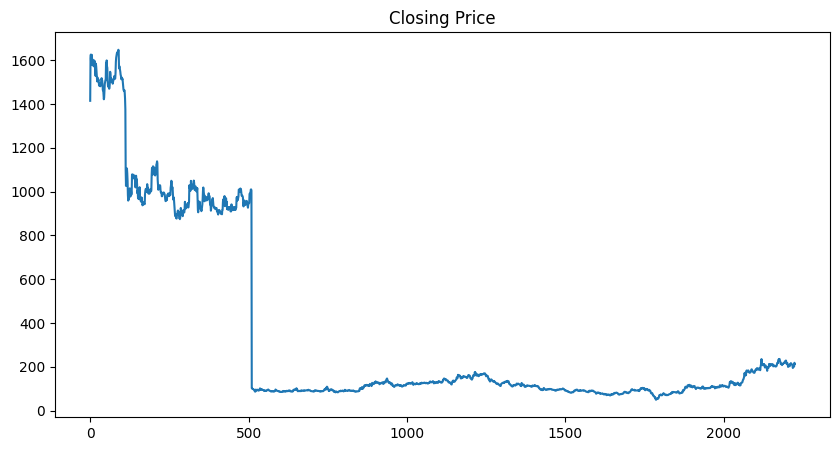

In [9]:
# Closing price visualization
plt.figure(figsize=(10,5))
plt.plot(dataset["Close"])
plt.title("Closing Price")
plt.show()

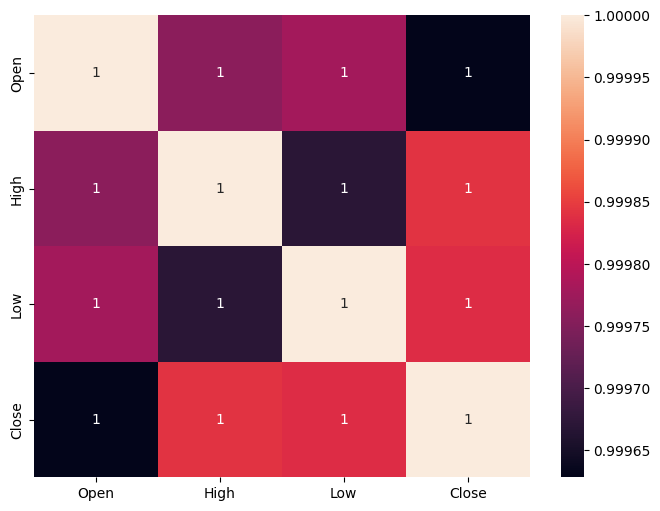

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(), annot=True)

plt.show()


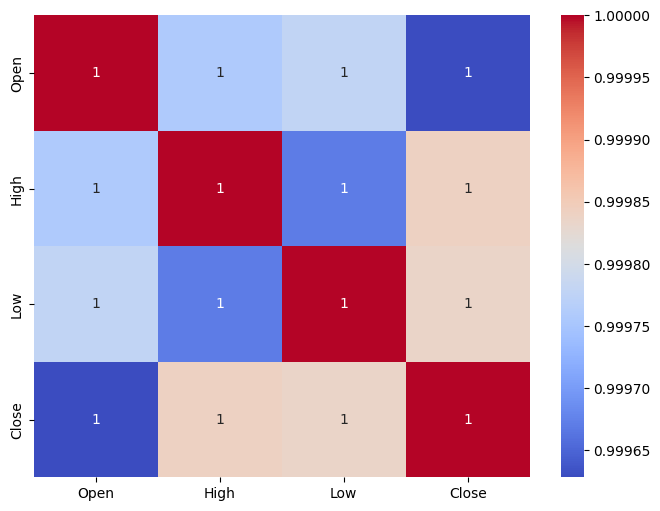

In [11]:
numeric_dataset = dataset.select_dtypes(include=np.number)

plt.figure(figsize=(8,6))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap="coolwarm")
plt.show()
